In [1]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Categorical.from_codes(iris.target, iris.target_names)

# Prepare data
X['Species'] = y
data = X.copy()
X = data.iloc[:, :-1]  # Feature columns
y = data['Species']    # Target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM with radial kernel
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate results
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Hyperparameter Tuning
param_grid = {'C': [0.5, 1, 2, 4], 'gamma': [0.5, 1, 2]}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, refit=True, cv=10)
grid.fit(X_train, y_train)

# Best parameters and accuracy
print("\nBest Parameters:")
print(grid.best_params_)

print("\nBest Cross-Validation Accuracy:")
print(1 - grid.best_score_)

# Display detailed performance
results = pd.DataFrame(grid.cv_results_)[['param_gamma', 'param_C', 'mean_test_score', 'std_test_score']]
print("\nDetailed Results:")
print(results)


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Accuracy Score:
1.0

Best Parameters:
{'C': 0.5, 'gamma': 1}

Best Cross-Validation Accuracy:
0.037272727272727346

Detailed Results:
    param_gamma  param_C  mean_test_score  std_test_score
0           0.5      0.5         0.953636        0.061718
1           1.0      0.5         0.962727        0.061180
2           2.0      0.5         0.953636        0.073905
3           0.5      1.0         0.944545        0.073231
4           1.0      1.0         0.953636        0.073905
5           2.0      1.0         0.953636        0.073905

# Data Vizualzations

### Overview of Pair Plot
1. **Diagonal Histograms**:
   - Each diagonal plot shows a histogram of values for a single feature, grouped by species.
   - The three colors (blue, orange, green) represent the three Iris species: **Setosa**, **Versicolor**, and **Virginica**.
   - For example, the `petal width` histogram in the bottom-right corner shows that Setosa (blue) has smaller petal widths than the other two species.

2. **Scatter Plots (Off-Diagonals)**:
   - Each off-diagonal scatter plot shows the relationship between two different features.
   - The points are color-coded by species, making it easier to see clusters and separations among species.

### Observations from Each Plot
- **`Sepal Length` vs. `Sepal Width` (Top-Left 2x2 block)**:
   - Setosa (blue) is clearly separated from Versicolor (orange) and Virginica (green) in this feature pair, forming a distinct cluster.
   - Versicolor and Virginica are more overlapping in this space but show a general trend, with Virginica having slightly larger sepal lengths.

- **`Petal Length` vs. `Petal Width` (Bottom-Right 2x2 block)**:
   - The plot shows three distinct clusters for Setosa, Versicolor, and Virginica.
   - This feature pair provides strong separation between species, with Setosa having the smallest petal measurements, Versicolor in the middle, and Virginica the largest.

- **Other Feature Pairs**:
   - **`Sepal Length` vs. `Petal Width`**, **`Sepal Width` vs. `Petal Length`**, etc., show varying degrees of separation.
   - `Petal Length` and `Petal Width` are particularly effective at differentiating species, especially for Setosa.

### Key Insights
- **Setosa** is the most distinct species, with clear clustering in most feature pairs.
- **Versicolor** and **Virginica** overlap in many plots, but the `petal length` and `petal width` features provide a strong separation.
- The diagonal histograms indicate that each species has characteristic feature ranges, especially in petal size.

## First Histogram
### Explanation of Plot Elements
1. **Histogram Bars**:
   - Each bar represents the count of samples within a specific sepal length range for each species.
   - The transparency allows for overlapping distributions, which makes it easier to see where species values overlap or are distinct.

2. **KDE Curves**:
   - The smooth lines represent the estimated density of the sepal lengths for each species.
   - The KDE provides a continuous curve that gives insight into the distribution's shape beyond the discrete bins of the histogram.

### Observations
- **Setosa** (blue):
  - The distribution is centered around a lower sepal length range (around 5 cm), and there is minimal overlap with the other species.
  - This indicates that Setosa has a distinctly smaller sepal length compared to Versicolor and Virginica.

- **Versicolor** (teal):
  - The distribution is mostly centered around the 5.5 to 6.5 cm range, with some overlap with both Setosa (on the lower end) and Virginica (on the higher end).
  - This overlap suggests that Versicolor's sepal length measurements fall between those of Setosa and Virginica.

- **Virginica** (green):
  - Virginica has the largest range of sepal lengths, mostly centered around 6 to 7 cm, with some samples extending toward 8 cm.
  - There is slight overlap with Versicolor but no overlap with Setosa.

### Key Insights
- **Setosa** is easily distinguishable by its smaller sepal lengths, with minimal overlap with the other species.
- **Versicolor** and **Virginica** show some overlap, but Virginica generally has larger sepal lengths.
- This plot suggests that **sepal length** could be a useful feature for distinguishing Setosa from the other two species, though it may not completely separate Versicolor from Virginica. 



## Second image
**X-axis:** Shows the sepal width in centimeters, ranging from approximately 2.0 cm to 4.5 cm.

**Y-axis:** Shows the count or frequency of observations for each sepal width range.

**Histograms:** Each histogram represents the distribution of sepal width for a specific species. The histograms are colored differently to distinguish between the species:

* **Blue:** setosa
* **Green:** versicolor
* **Light green:** virginica

**Kernel Density Estimates (KDE):** The smooth curves overlaid on the histograms are KDEs. They provide a smoothed representation of the distribution, helping to visualize the overall shape and trends.

**Observations:**

* **Setosa:** The setosa species has a narrower range of sepal widths, with most observations clustered around 3.0 cm.
* **Versicolor and Virginica:** The versicolor and virginica species have wider ranges of sepal widths, with some overlap in the middle. Versicolor tends to have slightly narrower sepals than virginica.

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  Species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


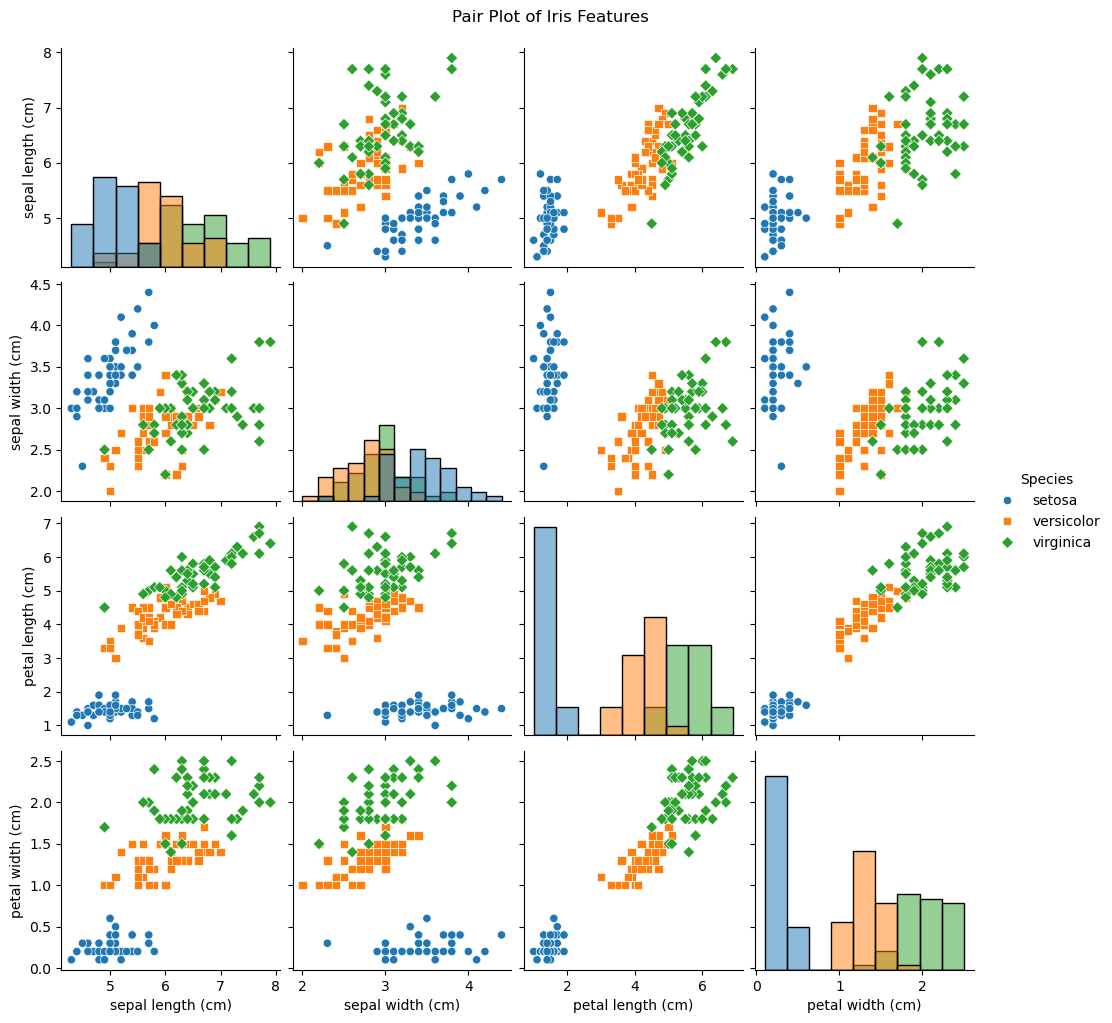

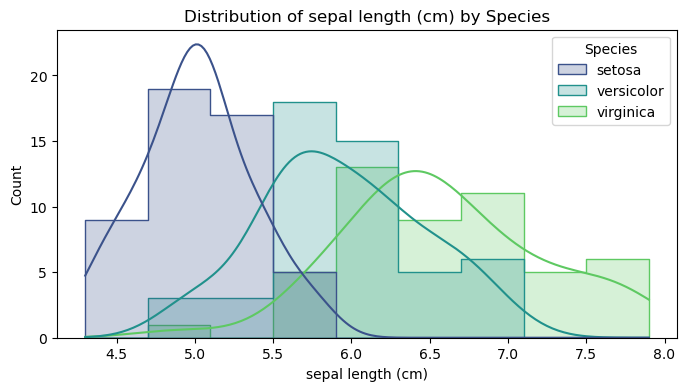

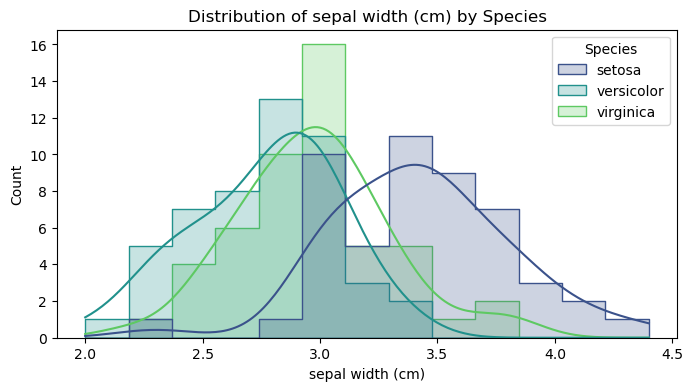

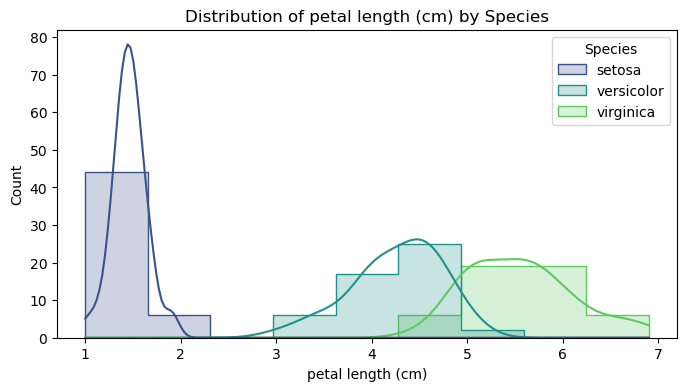

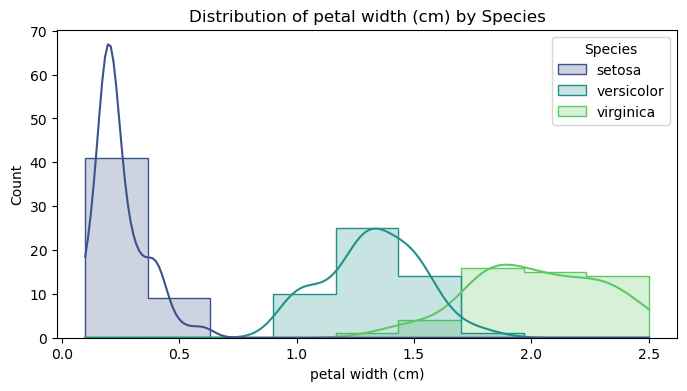

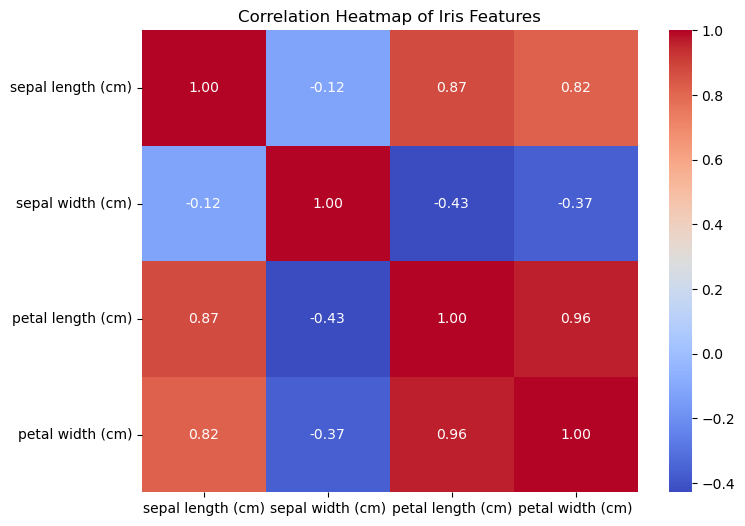

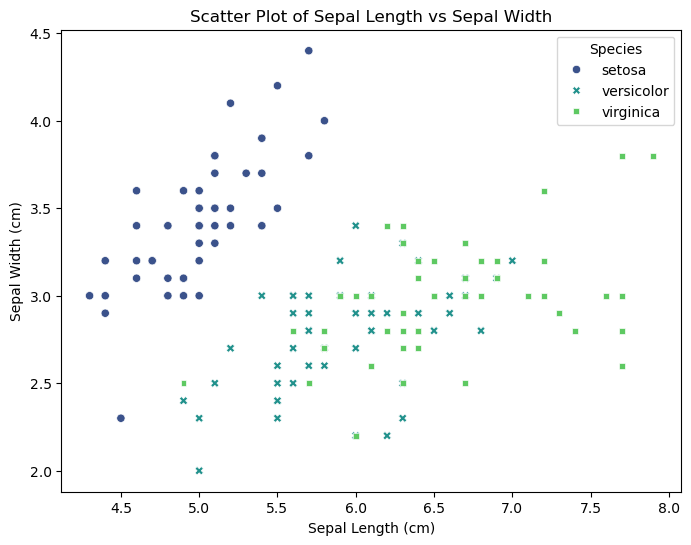

In [2]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Display the first few rows of the dataset
print(df.head())

# Pair plot for feature visualization
sns.pairplot(df, hue='Species', diag_kind='hist', markers=["o", "s", "D"])
plt.suptitle("Pair Plot of Iris Features", y=1.02)
plt.show()

# Distribution plot for each feature
for feature in iris.feature_names:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=feature, hue="Species", kde=True, palette="viridis", element="step")
    plt.title(f"Distribution of {feature} by Species")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
corr_matrix = df.iloc[:, :-1].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Iris Features")
plt.show()

# 2D scatter plot for selected features
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='Species', style='Species', palette='viridis')
plt.title("Scatter Plot of Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()
